# The Relational Algebra in Python

Copyright Jens Dittrich & Marcel Maltry, [Big Data Analytics Group](https://bigdata.uni-saarland.de/), [CC-BY-SA](https://creativecommons.org/licenses/by-sa/4.0/legalcode)

### Imports

In [1]:
from os import listdir
from graphviz import Source

from ra.relation import Relation
from ra.operators_log import *
from ra.operators_phys import *
from ra.utils import load_csv

### Loading Dataset

In [2]:
# Data source: https://relational.fit.cvut.cz/dataset/IMDb
# Information courtesy of IMDb (http://www.imdb.com). Used with permission.
# Notice: The data can only be used for personal and non-commercial use and must not
# be altered/republished/resold/repurposed to create any kind of online/offline
# database of movie information (except for individual personal use).

path = 'data/IMDb_sample'  
# create a list of all files in that directory that end with "*.csv":
files = [file for file in listdir(path) if file.endswith('.csv')]

relations = [load_csv(path + '/' + file, file[:-4], delimiter='\t') for file in files]

relationsDict = {}
for rel in relations:
    relationsDict[rel.name] = rel
    #globals()[rel.name] = rel
    rel.print_table(10)

----------------
movies_directors 
--------------------------
director_id  movie_id      
--------------------------
43095        121538       
78273        223710       
78273        118367       
78273        164572       
78273        267038       
43095        299073       
11652        10920        
11652        333856       
78273        176711       
43095        291833       

------
actors 
--------------------------------------------------------------------------------------------
id                     first_name             last_name              gender                  
--------------------------------------------------------------------------------------------
654019                 Brenda                 Hillhouse              F                      
160622                 Ken (I)                Fritz                  M                      
684623                 Diana                  Körner                 F                      
198005                 James B.       

In [3]:
# build LeafRelation object from relations dictionary
movies_directors = LeafRelation(relationsDict['movies_directors'])
actors = LeafRelation(relationsDict['actors'])
directors = LeafRelation(relationsDict['directors'])
movies_genres = LeafRelation(relationsDict['movies_genres'])
directors_genres = LeafRelation(relationsDict['directors_genres'])
movies = LeafRelation(relationsDict['movies'])
roles = LeafRelation(relationsDict['roles'])

In [4]:
directors.evaluate().print_set()

[directors] : {[id:int, first_name:str, last_name:str]}
{
	(11652, James (I), Cameron),
	(43095, Stanley, Kubrick),
	(78273, Quentin, Tarantino)
}


In [5]:
directors.evaluate().print_latex()

\definecolor{tableheadercolor}{rgb}{0.8,0.8,0.8}\begin{tabular}{|l|l|l|}\hline
\multicolumn{3}{|l|}{\cellcolor{tableheadercolor}{\textbf{directors}}}\\\hline
	\cellcolor{tableheadercolor}{\textbf{id}} & \cellcolor{tableheadercolor}{\textbf{first\textunderscore name}} & \cellcolor{tableheadercolor}{\textbf{last\textunderscore name}} \\
	\hline\hline
	11652 & James (I) & Cameron \\
	43095 & Stanley & Kubrick \\
	78273 & Quentin & Tarantino \\
\hline
\end{tabular}


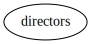

In [6]:
graph = directors.get_graph()
graph

# Basisoperatoren

## Selection

In [7]:
newmovies =  Selection_ScanBased(movies, 'year>2000')

In [8]:
print(newmovies)

σ_ScanBased[year>2000](movies)


In [9]:
newmovies.evaluate()

------
Result 
----------------------------------------------------------------------------------------
id                    name                  year                  rank                   
----------------------------------------------------------------------------------------
127297                Ghosts of the Abyss   2003                  6.7                   
10934                 Aliens of the Deep    2005                  6.5                   
105938                Expedition: Bismarck  2002                  7.5                   
176711                Kill Bill: Vol. 1     2003                  8.4                   
176712                Kill Bill: Vol. 2     2004                  8.2                   
96779                 Earthship.TV          2001                  5.6                   
393538                Jimmy Kimmel Live!    2003                  6.7                   
159665                Inglorious Bastards   2006                  8.3                   

In [10]:
newmovies.evaluate().name

'Result'

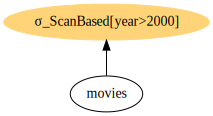

In [11]:
graph = newmovies.get_graph()
graph

## Projection

In [12]:
exp2 = Projection_ScanBased(newmovies, 'id, year')

In [13]:
print(exp2)

π_ScanBased[id, year](σ_ScanBased[year>2000](movies))


In [14]:
exp2.evaluate()

------
Result 
----------------
id      year     
----------------
176711  2003    
393538  2003    
10934   2005    
96779   2001    
176712  2004    
105938  2002    
159665  2006    
127297  2003    

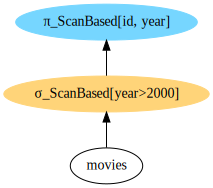

In [15]:
graph = exp2.get_graph()
graph

## Union

In [16]:
goodmovies = Selection_ScanBased(movies, 'rank>=7.5')
goodOrNew = Union_HashBased(goodmovies, newmovies)

In [17]:
print(goodOrNew)

(σ_ScanBased[rank>=7.5](movies)) ∪ (σ_ScanBased[year>2000](movies))


In [18]:
goodOrNew.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(121538, Full Metal Jacket, 1987, 8.2),
	(299073, Shining, The, 1980, 8.2),
	(328285, Terminator, The, 1984, 7.9),
	(387728, ER, 1994, 7.7),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(250612, Paths of Glory, 1957, 8.6),
	(10920, Aliens, 1986, 8.2),
	(267038, Pulp Fiction, 1994, 8.7),
	(276217, Reservoir Dogs, 1992, 8.3),
	(127297, Ghosts of the Abyss, 2003, 6.7),
	(177019, Killing, The, 1956, 8.1),
	(310455, Spartacus, 1960, 8.0),
	(92616, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, 1964, 8.7),
	(30431, Barry Lyndon, 1975, 7.9),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(96779, Earthship.TV, 2001, 5.6),
	(328277, Terminator 2: Judgment Day, 1991, 8.1),
	(10934, Aliens of the Deep, 2005, 6.5),
	(105938, Expedition: Bismarck, 2002, 7.5),
	(65764, Clockwork Orange, A, 1971, 8.3),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(164572, Jackie Brown, 1997, 7.5),
	(193519

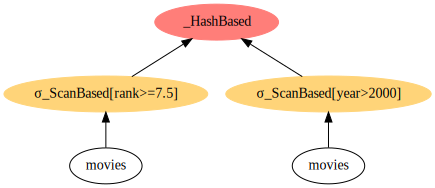

In [19]:
graph = goodOrNew.get_graph()
graph

Alternatively, without union but with two conditions in the selection instead.

In [20]:
goodOrNewSel = Selection_ScanBased(movies, 'year>2000 or rank>=7.5')

In [21]:
print(goodOrNewSel)

σ_ScanBased[year>2000 or rank>=7.5](movies)


In [22]:
goodOrNewSel.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(121538, Full Metal Jacket, 1987, 8.2),
	(299073, Shining, The, 1980, 8.2),
	(328285, Terminator, The, 1984, 7.9),
	(387728, ER, 1994, 7.7),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(250612, Paths of Glory, 1957, 8.6),
	(10920, Aliens, 1986, 8.2),
	(267038, Pulp Fiction, 1994, 8.7),
	(276217, Reservoir Dogs, 1992, 8.3),
	(127297, Ghosts of the Abyss, 2003, 6.7),
	(177019, Killing, The, 1956, 8.1),
	(310455, Spartacus, 1960, 8.0),
	(92616, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, 1964, 8.7),
	(30431, Barry Lyndon, 1975, 7.9),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(96779, Earthship.TV, 2001, 5.6),
	(328277, Terminator 2: Judgment Day, 1991, 8.1),
	(10934, Aliens of the Deep, 2005, 6.5),
	(105938, Expedition: Bismarck, 2002, 7.5),
	(65764, Clockwork Orange, A, 1971, 8.3),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(164572, Jackie Brown, 1997, 7.5),
	(193519

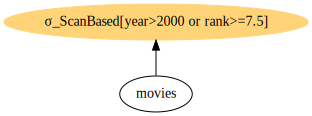

In [23]:
graph = goodOrNewSel.get_graph()
graph

## Difference


In [24]:
badmovies = Selection_ScanBased(movies, 'rank<7.5')
newGoodMovies = Difference_HashBased(newmovies, badmovies)

In [25]:
print(newGoodMovies)

(σ_ScanBased[year>2000](movies)) − (σ_ScanBased[rank<7.5](movies))


In [26]:
newGoodMovies.evaluate()

------
Result 
----------------------------------------------------------------------------------------
id                    name                  year                  rank                   
----------------------------------------------------------------------------------------
176711                Kill Bill: Vol. 1     2003                  8.4                   
159665                Inglorious Bastards   2006                  8.3                   
176712                Kill Bill: Vol. 2     2004                  8.2                   
105938                Expedition: Bismarck  2002                  7.5                   

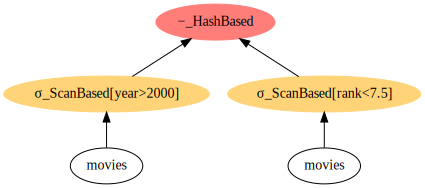

In [27]:
graph = newGoodMovies.get_graph()
graph

Alternatively, without intersection but with two conditions in the selection instead.

In [28]:
newGoodMoviesSel = Selection_ScanBased(movies, 'year>2000 and not rank<7.5')

In [29]:
newGoodMoviesSel.evaluate()

------
Result 
----------------------------------------------------------------------------------------
id                    name                  year                  rank                   
----------------------------------------------------------------------------------------
176711                Kill Bill: Vol. 1     2003                  8.4                   
176712                Kill Bill: Vol. 2     2004                  8.2                   
105938                Expedition: Bismarck  2002                  7.5                   
159665                Inglorious Bastards   2006                  8.3                   

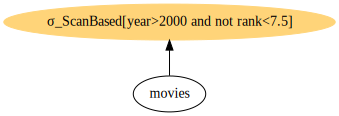

In [30]:
graph = newGoodMoviesSel.get_graph()
graph

## Cartesian Product

In [31]:
cartesianProduct = Cartesian_Product_NestedLoop(directors, directors_genres)

In [32]:
print(cartesianProduct)

(directors) × (directors_genres)


In [33]:
directors.evaluate()

---------
directors 
------------------------------------
id          first_name  last_name    
------------------------------------
11652       James (I)   Cameron     
43095       Stanley     Kubrick     
78273       Quentin     Tarantino   

In [34]:
directors_genres.evaluate()

----------------
directors_genres 
---------------------------------------
director_id  genre        prob          
---------------------------------------
43095        Sci-Fi       0.1875       
78273        Action       0.5          
11652        Drama        0.25         
11652        Action       0.5          
11652        Thriller     0.416667     
78273        Mystery      0.125        
43095        Romance      0.1875       
11652        Adventure    0.166667     
43095        Thriller     0.1875       
43095        Short        0.1875       


In [35]:
len(directors_genres.evaluate()), len(directors.evaluate())

(35, 3)

In [36]:
print('number of expected tuples in cross product: ', len(directors_genres.evaluate())*len(directors.evaluate()))

number of expected tuples in cross product:  105


In [37]:
cartesianProduct.evaluate()

------
Result 
------------------------------------------------------------------------------
id           first_name   last_name    director_id  genre        prob          
------------------------------------------------------------------------------
43095        Stanley      Kubrick      43095        Action       0.0625       
78273        Quentin      Tarantino    43095        Mystery      0.0625       
43095        Stanley      Kubrick      11652        Sci-Fi       0.5          
43095        Stanley      Kubrick      43095        Mystery      0.0625       
78273        Quentin      Tarantino    78273        Mystery      0.125        
78273        Quentin      Tarantino    43095        Documentary  0.1875       
11652        James (I)    Cameron      43095        Documentary  0.1875       
11652        James (I)    Cameron      43095        Action       0.0625       
43095        Stanley      Kubrick      78273        Thriller     0.5          
11652        James (I)    Cameron   

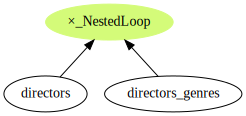

In [38]:
graph = cartesianProduct.get_graph()
graph

## Renaming Relation

In [39]:
exp11 = Renaming_Relation_ScanBased(goodOrNew, 'good_or_new')

In [40]:
exp11.evaluate().print_set()

[good_or_new] : {[id:int, name:str, year:int, rank:float]}
{
	(121538, Full Metal Jacket, 1987, 8.2),
	(299073, Shining, The, 1980, 8.2),
	(328285, Terminator, The, 1984, 7.9),
	(387728, ER, 1994, 7.7),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(250612, Paths of Glory, 1957, 8.6),
	(10920, Aliens, 1986, 8.2),
	(267038, Pulp Fiction, 1994, 8.7),
	(276217, Reservoir Dogs, 1992, 8.3),
	(127297, Ghosts of the Abyss, 2003, 6.7),
	(177019, Killing, The, 1956, 8.1),
	(310455, Spartacus, 1960, 8.0),
	(92616, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, 1964, 8.7),
	(30431, Barry Lyndon, 1975, 7.9),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(96779, Earthship.TV, 2001, 5.6),
	(328277, Terminator 2: Judgment Day, 1991, 8.1),
	(10934, Aliens of the Deep, 2005, 6.5),
	(105938, Expedition: Bismarck, 2002, 7.5),
	(65764, Clockwork Orange, A, 1971, 8.3),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(164572, Jackie Brown, 1997, 7.5),
	(1

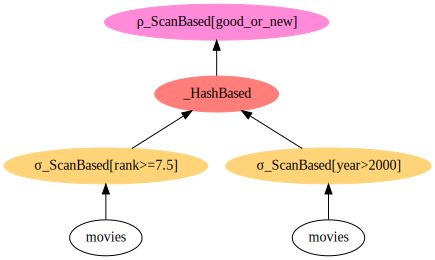

In [41]:
graph = exp11.get_graph()
graph

## Renaming Attributes

In [42]:
exp12 = Renaming_Attributes_ScanBased(exp11, 'movies<-name, published<-year')

In [43]:
exp12.evaluate().print_set(10)

[Result] : {[id:int, movies:str, published:int, rank:float]}
{
	(121538, Full Metal Jacket, 1987, 8.2),
	(299073, Shining, The, 1980, 8.2),
	(328285, Terminator, The, 1984, 7.9),
	(387728, ER, 1994, 7.7),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(250612, Paths of Glory, 1957, 8.6),
	(10920, Aliens, 1986, 8.2),
	(267038, Pulp Fiction, 1994, 8.7),
	(276217, Reservoir Dogs, 1992, 8.3)
}


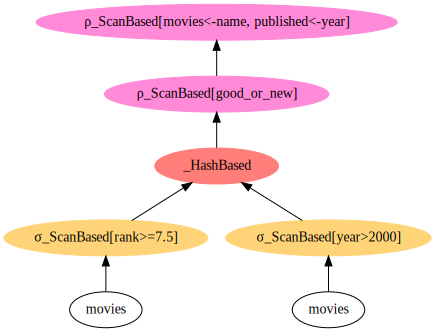

In [44]:
graph = exp12.get_graph()
graph

# Derived Operators

## Intersection

In [45]:
goodAndNew = Intersection_HashBased(newmovies, goodmovies)

In [46]:
goodAndNew.evaluate()

------
Result 
----------------------------------------------------------------------------------------
id                    name                  year                  rank                   
----------------------------------------------------------------------------------------
176711                Kill Bill: Vol. 1     2003                  8.4                   
159665                Inglorious Bastards   2006                  8.3                   
176712                Kill Bill: Vol. 2     2004                  8.2                   
105938                Expedition: Bismarck  2002                  7.5                   

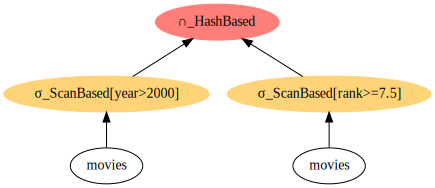

In [47]:
graph = goodAndNew.get_graph()
graph

Alternatively, without intersection but with two conditions in the selection instead:

In [48]:
goodAndNewSel = Selection_ScanBased(movies, "year>2000 and rank>=7.5")

In [49]:
goodAndNewSel.evaluate()

------
Result 
----------------------------------------------------------------------------------------
id                    name                  year                  rank                   
----------------------------------------------------------------------------------------
176711                Kill Bill: Vol. 1     2003                  8.4                   
176712                Kill Bill: Vol. 2     2004                  8.2                   
105938                Expedition: Bismarck  2002                  7.5                   
159665                Inglorious Bastards   2006                  8.3                   

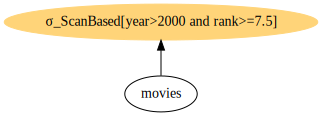

In [50]:
graph = goodAndNewSel.get_graph()
graph

## Theta Join

In [51]:
directorsAndTheirMovies = Theta_Join_NestedLoop(directors, movies_directors, "id==director_id")

In [52]:
directorsAndTheirMovies.evaluate().print_table(20)

------
Result 
-----------------------------------------------------------------
id           first_name   last_name    director_id  movie_id      
-----------------------------------------------------------------
11652        James (I)    Cameron      11652        369522       
43095        Stanley      Kubrick      43095        110246       
78273        Quentin      Tarantino    78273        393538       
43095        Stanley      Kubrick      43095        291833       
43095        Stanley      Kubrick      43095        193519       
78273        Quentin      Tarantino    78273        276217       
78273        Quentin      Tarantino    78273        159665       
43095        Stanley      Kubrick      43095        310455       
11652        James (I)    Cameron      11652        328277       
11652        James (I)    Cameron      11652        256530       
43095        Stanley      Kubrick      43095        65764        
43095        Stanley      Kubrick      43095        1711    

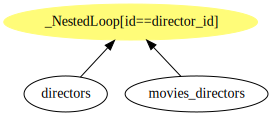

In [53]:
graph = directorsAndTheirMovies.get_graph()
graph

# Extensions

## Grouping

### Idea
Count the number of female/male actors.
* group by gender
* count the number of actors per group, count(*)

In [54]:
grouping = Grouping_HashBased(actors, 'gender', 'count(*)')

In [55]:
grouping.evaluate().print_set()

[Result] : {[gender:str, count_star:int]}
{
	(M, 802),
	(F, 289)
}


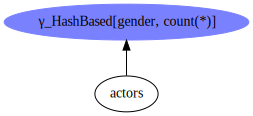

In [56]:
graph = grouping.get_graph()
graph

In [57]:
#actors.relation.print_set()

In [58]:
grouping2 = Grouping_HashBased(actors, 'first_name,last_name', 'count(*)')

In [59]:
print(grouping2)

(γ_[first_name, last_name, count(*)] (actors)


In [60]:
grouping2.evaluate()

------
Result 
---------------------------------------------------------------------
first_name             last_name              count_star              
---------------------------------------------------------------------
Joanna                 Barnes                 1                      
Anders (I)             Falk                   1                      
Liam                   Tuohy                  1                      
Jerry                  Jarret                 1                      
James (IV)             Allen                  1                      
Nigel                  Goulding               1                      
J. Kenneth             Campbell               1                      
Fred                   Bell                   1                      
Phil                   Stevenson              1                      
Vince                  Edwards                1                      


### Idea
* group by year
* count the number of movies per year, count(*)
* sum up the movie ids per year, sum(id)
* compute average movie id per year, avg(id)

The latter two do not make sense but show that multiple aggregations can be computed in one grouping.

In [61]:
grouping = Grouping_HashBased(movies, 'year', 'count(*), sum(id), avg(id)')

In [62]:
grouping.evaluate()

------
Result 
--------------------------------------------------------------------------------
year                count_star          sum_id              avg_id               
--------------------------------------------------------------------------------
1995                1                   118367              118367.0            
1996                1                   322652              322652.0            
1964                1                   92616               92616.0             
1991                1                   328277              328277.0            
2005                1                   10934               10934.0             
2000                1                   385710              385710.0            
1955                1                   176891              176891.0            
1999                1                   106666              106666.0            
2001                1                   96779               96779.0             
1962        

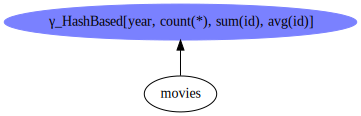

In [63]:
graph = grouping.get_graph()
graph